<a href="https://colab.research.google.com/github/roysayan96/Deep_learning/blob/main/Deep_learning_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=150, height=None):
     
    height = height if height is not None else width
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
   
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [10]:
# modify to fit your system
data_path = '/content/drive/MyDrive/image'
os.listdir(data_path)

['Natural',
 'MouseHead',
 'TigerHead',
 'RabbitHead',
 'WolfHead',
 'MonkeyHead',
 'PigeonHead',
 'SheepHead',
 'PandaHead',
 'PigHead',
 'LionHead',
 'EagleHead',
 'ElephantHead',
 'DogHead',
 'DeerHead',
 'CowHead',
 'ChickenHead',
 'HumanHead',
 'DuckHead',
 'CatHead',
 'BearHead']

In [11]:
#Printing the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /content


In [12]:
base_name = 'animal_faces'
width = 80
 
include = {'ChickenHead', 'BearHead', 'ElephantHead', 
           'EagleHead', 'DeerHead', 'MonkeyHead', 'PandaHead'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)


MonkeyHead
PandaHead
EagleHead
ElephantHead
DeerHead
ChickenHead
BearHead


In [13]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  716
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)animal images in rgb
image shape:  (80, 80, 3)
labels: ['Bear' 'Chicken' 'Deer' 'Eagle' 'Elephant' 'Monkey' 'Panda']


Counter({'Bear': 101,
         'Chicken': 100,
         'Deer': 101,
         'Eagle': 97,
         'Elephant': 100,
         'Monkey': 100,
         'Panda': 117})

In [14]:
Counter({'Chicken': 100,
         'Bear': 101,
         'Elephant': 100,
         'Eagle': 97,
         'Deer': 101,
         'Monkey': 100,
         'Panda': 117})

Counter({'Bear': 101,
         'Chicken': 100,
         'Deer': 101,
         'Eagle': 97,
         'Elephant': 100,
         'Monkey': 100,
         'Panda': 117})

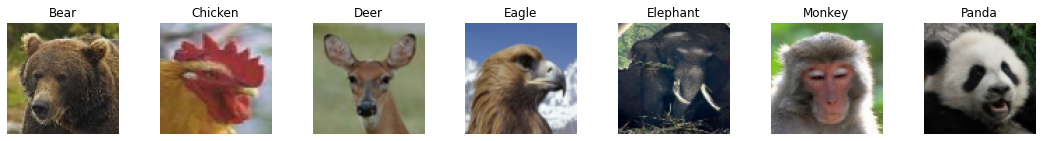

In [15]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [16]:
#Storing features of images into numpy array
X = np.array(data['data'])
y = np.array(data['label'])

In [17]:

print(X)

[[[[0.44705882 0.72720588 0.20467218]
   [0.44485294 0.7254902  0.1877451 ]
   [0.44093137 0.72328431 0.15563725]
   ...
   [0.43578431 0.57745098 0.46029412]
   [0.44857537 0.58970588 0.47382047]
   [0.46053922 0.59828431 0.48578431]]

  [[0.45955882 0.73524816 0.225     ]
   [0.45528493 0.73333333 0.20392157]
   [0.45488664 0.73455882 0.17916667]
   ...
   [0.44632353 0.57866115 0.47449449]
   [0.45160846 0.58494179 0.48151042]
   [0.45637255 0.58916973 0.48573836]]

  [[0.4761489  0.74134498 0.25597426]
   [0.46348039 0.72990196 0.22598039]
   [0.47219669 0.7379902  0.2087163 ]
   ...
   [0.44765625 0.57573529 0.48235294]
   [0.45098039 0.57647059 0.48627451]
   [0.44918811 0.57467831 0.48448223]]

  ...

  [[0.5001685  0.50376838 0.51977635]
   [0.46030944 0.464231   0.47991728]
   [0.39180453 0.39512868 0.41214767]
   ...
   [0.57233456 0.58655025 0.38949142]
   [0.45490196 0.49898897 0.28967525]
   [0.47046569 0.5433364  0.32544424]]

  [[0.43258272 0.43650429 0.45219056]
   [0.4

In [18]:
print(y)

['Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey'
 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey'
 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey'
 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey'
 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey'
 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey'
 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey'
 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey'
 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey'
 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey'
 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey'
 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Monkey'
 'Monkey' 'Monkey' 'Monkey' 'Monkey' 'Panda' 'Panda' 'Panda' 'Panda'
 'Panda' 'Panda' 'Panda' 'Panda' 'Panda' 'Panda' 'Panda

In [19]:
#Spliting the Dataset Train 80% and test 20%
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

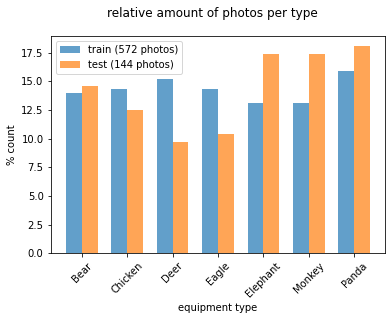

In [20]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [22]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

In [23]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(572, 576)


In [24]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

In [26]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('Accuracy: ', 100*np.sum(y_pred == y_test)/len(y_test))

[ True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False False  True  True  True
  True]

Accuracy:  85.41666666666667


In [27]:
#Importing panda
import pandas as pd
labels = ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',  'no', 'no', 'no']
predictions = ['yes', 'yes', 'yes', 'yes', 'no',  'no',  'yes', 'no', 'no', 'no']
 
# put the data in a dataframe for pretty printing
df = pd.DataFrame(
    np.c_[labels, predictions], 
    columns=['true_label', 'prediction']
)
df

,true_label,prediction
0,yes,yes
1,yes,yes
2,yes,yes
3,yes,yes
4,yes,no
5,yes,no
6,no,yes
7,no,no
8,no,no
9,no,no


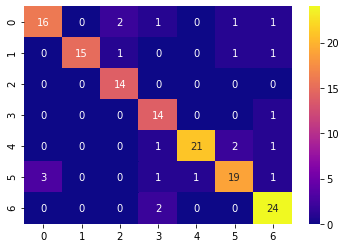

In [28]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm1=confusion_matrix(y_test,y_pred)
sns.heatmap(cm1, cmap="plasma",annot=True)

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.8541666666666666

In [30]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.8541666666666666

In [31]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average="macro"))

0.8586707711642149


In [32]:
print('Accuracy: ', 100*np.sum(y_pred == y_test)/len(y_test))

Accuracy:  85.41666666666667
